<a href="https://colab.research.google.com/github/kelvinfoo123/Machine-Learning-Projects/blob/main/Lung_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Data**

In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

cancer = pd.read_csv("lung_cancer.csv")
cancer.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


Looking at the data, we need to 

*   scale the age column
*   encode gender and lung cancer columns into 0 and 1

*  change 1 and 2 to 0 and 1 in the columns Smoking, Yellow_Fingers, ... , Chest Pain







**Basic Understanding of Data**

In [ ]:
cancer.shape # 309 samples and 16 columns, including target variable Lung_Cancer

(309, 16)

In [ ]:
cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


By looking at the mean, 

*   Most participants in the survey are elderly people with mean age around 62 years old. There are some young people, the youngest being 21 years old. 
*   Most participants are smokers. Most partcipants have yellow fingers. 

*   The data for anxiety, perr pressure and chronic disease is rather balanced, with mean very near to 1.50. 
*   Most partcipants have fatigue, allergy, wheezing, consume alcohol, cough and experience shortness of breath. 

*   Most participants do not have difficulty swallowing. 
*   Most participants experience chest pain.







In [ ]:
cancer.isnull().sum() # No null values. 

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [2]:
cancer.duplicated().sum() # There are 33 duplicated samples in the dataset. 

# Drop duplicate
cancer.drop_duplicates(inplace = True)

In [ ]:
cancer.shape # The data now only has 276 samples. 

(276, 16)

**Exploratory Data Analysis**

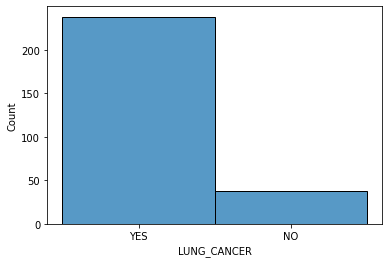

In [ ]:
# Distribution of lung cancer 
sns.histplot(x = 'LUNG_CANCER', data = cancer)

There are much more participants with lung cancer. 

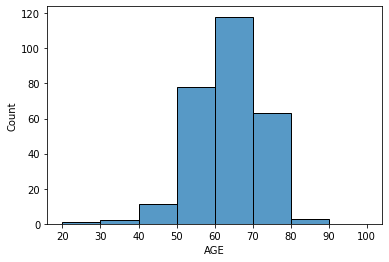

In [ ]:
# Distribution of age
sns.histplot(x = 'AGE', data = cancer, binwidth = 10, binrange = (20,100))

Majority of the participants are aged 60-70.

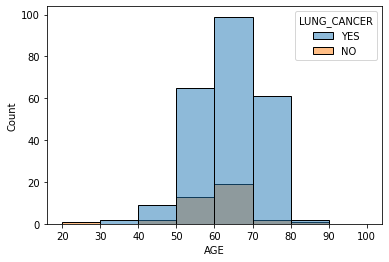

In [ ]:
sns.histplot(x = 'AGE', data = cancer, hue = 'LUNG_CANCER', binwidth = 10, binrange = (20,100))

Majority of the participants in each age group has lung cancer.

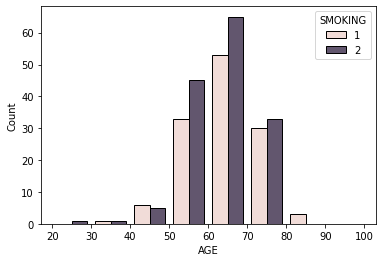

In [ ]:
sns.histplot(x = 'AGE', data = cancer, hue = 'SMOKING', multiple = 'dodge', 
             shrink = 0.8, binwidth = 10, binrange = (20,100))

Majority of the participants of the age 50 - 80 are smokers. 

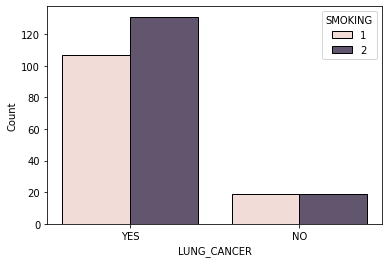

In [ ]:
# Relationship between smoking and lung cancer 
sns.histplot(x = 'LUNG_CANCER', hue = 'SMOKING', multiple = 'dodge', shrink = 0.8, data = cancer)

Among participants with lung cancer, there are more smokers than non-smokers. 

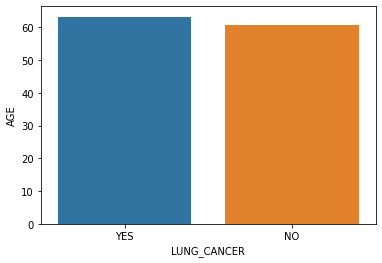

In [ ]:
sns.barplot(x = 'LUNG_CANCER', y = 'AGE', data = cancer, ci = None)

Participants with and without lung cancer have approximately the same average age at 60.

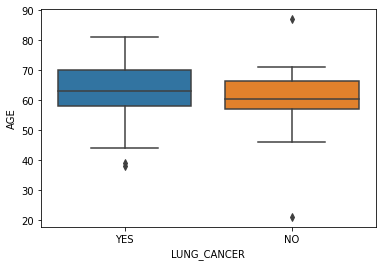

In [ ]:
sns.boxplot(x = 'LUNG_CANCER', y = 'AGE', data =  cancer)

**Data Preparation**

In [15]:
# Label Encoder 

from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
cancer["GENDER"] = encoder.fit_transform(cancer["GENDER"])
cancer["LUNG_CANCER"] = encoder.fit_transform(cancer["LUNG_CANCER"])

cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [16]:
# Split into X and y 

X = cancer.drop(["LUNG_CANCER"], axis = 1)
y = cancer["LUNG_CANCER"]

In [17]:
# Change 1 and 2 to 0 and 1 

for i in X.columns[2:]: 
  temp = []
  for j in X[i]: 
    temp.append(j - 1)
  X[i] = temp 

X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [18]:
# Scaling 

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X['AGE'] = scaler.fit_transform(X[['AGE']])

In [19]:
# Oversampling of minority class 
# One way to deal with imbalanced data is to oversample, meaning to add more copies to the minority class.
# RandomOverSampler generates new samples by randomly sampling with replacement of the currently available samples. 

from imblearn.over_sampling import RandomOverSampler 
X, y = RandomOverSampler().fit_resample(X,y) 

In [20]:
# Split into training and test set 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## **Model Building**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score 

**K-Nearest Neighbors**

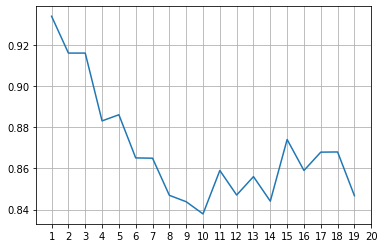

In [ ]:
# Find the most suitable k-value 

knn_scores = []
for i in range(1,20): 
  knn = KNeighborsClassifier(n_neighbors = i)
  scores = cross_val_score(knn, X_train,y_train, cv = 5)
  knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)], knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

The most suitable k-Neighbor value is 1 since it gave the highest score. 

**Comparison of all models**

In [22]:
knn = KNeighborsClassifier(n_neighbors = 1)
lr = LogisticRegression()
svc= SVC(kernel = 'linear')
rfc = RandomForestClassifier()
boost = GradientBoostingClassifier()

In [23]:
model = [knn, lr, svc, rfc, boost]

final_accuracy = []
final_recall = []

def best_score(model, X, y, cv = 5): 
  accuracy = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv).mean()
  recall = cross_val_score(model, X, y, cv = cv, scoring = 'recall').mean() # Recall answers the question what % of true positives are identified correctly.
  final_accuracy.append(accuracy)
  final_recall.append(recall)

for i in model: 
  best_score(i, X, y)


pd.DataFrame(data = final_accuracy, columns = ["accuracy"], index = ['knn', 'logostic regression', 'SVC', 'random forest classifier', 'boost'])

,accuracy
knn,0.960066
logostic regression,0.890680
SVC,0.907478
random forest classifier,0.966360
boost,0.957982


In [24]:
pd.DataFrame(data = final_recall, columns = ["recall"], index = ['knn', 'logostic regression', 'SVC', 'random forest classifier', 'boost'])

,recall
knn,0.924291
logostic regression,0.869504
SVC,0.865603
random forest classifier,0.915957
boost,0.915957


Random Forest Classifier has the highest accuracy and highest recall. 

In [25]:
from sklearn.metrics import classification_report

rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.96      0.98        71

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



Accuracy = 97 % and Recall = 94 %

Text(33.0, 0.5, 'Actual')

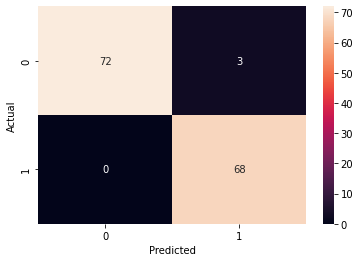

In [28]:
from sklearn.metrics import confusion_matrix 

confusion_rfc = confusion_matrix(y_pred_rfc, y_test)

sns.heatmap(confusion_rfc, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [30]:
# Postive predictive and negative predictive value 
# Calculate the probability that a person tested positive will have the disease and the probability that a person tested negative will not have the disease respectively. 

tp = 72
fp = 3
fn = 0 
tn = 68

ppv = tp / (tp + fp)
npv = tn / (tn + fn)

print(f'The positive predictive value is {round(ppv,2)}.')
print(f'The negative predictive value is {npv}.')

The positive predictive value is 0.96.
The negative predictive value is 1.0.


The auc is 0.997.


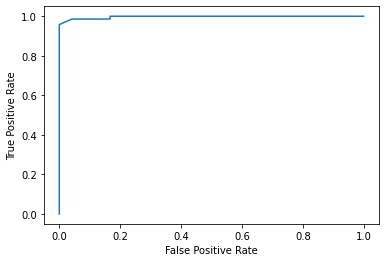

In [34]:
# ROC
from sklearn.metrics import roc_curve 

y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#AU-ROC
from sklearn.metrics import roc_auc_score 
auc = roc_auc_score(y_test, y_pred_proba)
print(f'The auc is {round(auc,3)}.')

**Model interpretation**

In [35]:
!pip install shap 
import shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 26.4 MB/s 


In [42]:
# Compute shap values 
explainer = shap.TreeExplainer(rfc)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

(2, 333, 15)


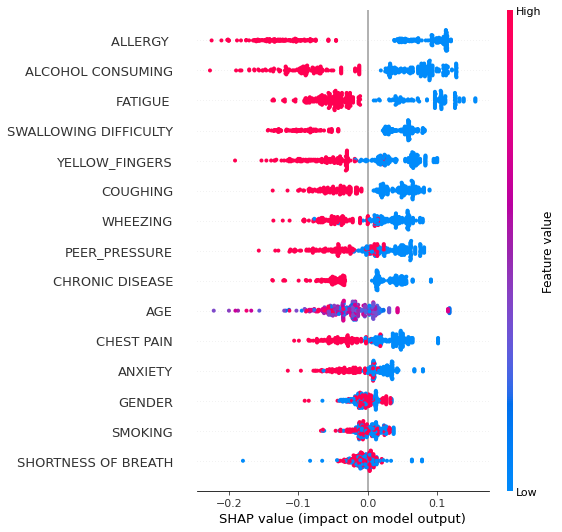

In [44]:
# Summary plot for class 0 
shap.summary_plot(shap_values[0], X_train)

For participants labelled with no lung cancer, top 3 most influential factors are allergy, alcohol consumption and fatigue. 

Eg. Not consuming alcohol, not coughing and no anxiety increaaes the probability of being predicted with no lung cancer. 

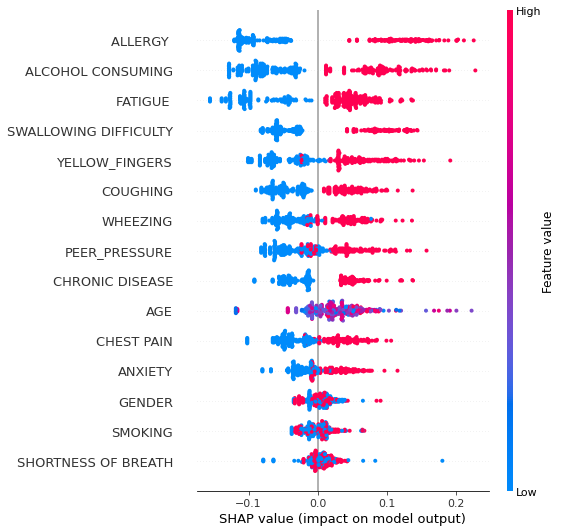

In [45]:
shap.summary_plot(shap_values[1], X_train)

Allergy, alcohol consumption, fatigue are the most influential factors. 

Eg. Consuming alcohol, fatigue, coughing increases the probability of being predicted with lung cancer. 

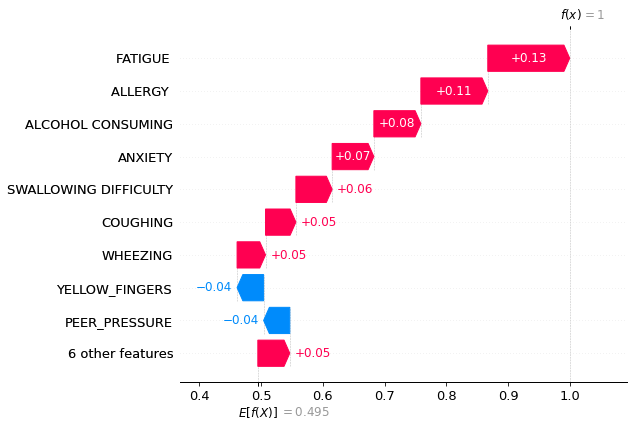

In [49]:
# Examine amplitude of impact of a feature 

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][0], feature_names = X_test.columns)